### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
sns.set_context("poster")

warnings.filterwarnings("ignore")

### Load the dataset

In [4]:
df = pd.read_csv("HeartDiseasePrediction.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Check for null values

In [5]:
print("***********************************")
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Checking for null values

print("*****Percentage of Null Values*****")
print(round(df.isnull().sum() * 100/df.shape[0]))
print("***********************************")

***********************************
Number of Rows: 918
Number of Columns: 12
*****Percentage of Null Values*****
Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64
***********************************


<p> <mark>There are <strong>no NULL values</strong> in this dataframe.</mark></p>

In [6]:
# Descriptive Statistics of the numerical colums and percentile to find any potential outliers... (Hidden Input)

df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98,0.99]).style.set_properties(**{"color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
90%,65.000000,160.000000,305.000000,1.000000,170.000000,2.300000,1.000000
95%,68.000000,160.000000,331.300000,1.000000,178.000000,3.000000,1.000000
98%,71.660000,180.000000,384.660000,1.000000,183.320000,3.600000,1.000000


Text(0.5, 1.0, 'Class distribution of the dataset')

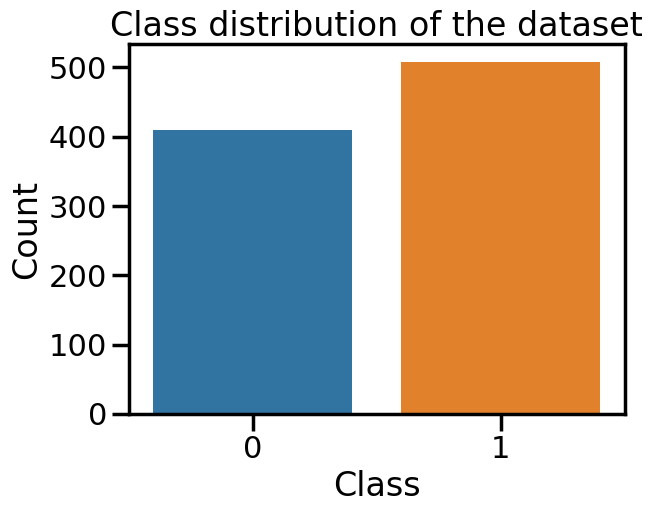

In [7]:
# find the class distribution of the given data set
axis = sns.countplot(x='HeartDisease', data = df)
axis.set(xlabel='Class', ylabel='Count')
plt.title('Class distribution of the dataset')

### Check for the categorical columns

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [9]:
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

### Perform Label encoding to convert categorical data into numerical values.

In [10]:
from sklearn.preprocessing import LabelEncoder

# Assuming X is your feature matrix with categorical columns
# and y is your target variable
X = df.drop(axis=1, columns=['HeartDisease'])
y = df['HeartDisease'].values # y is an array

# Create a copy of the original DataFrame
df_encoded = df.copy()

# Initialize label encoders for each categorical column
label_encoders = {}

# Encode categorical columns
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df[col])

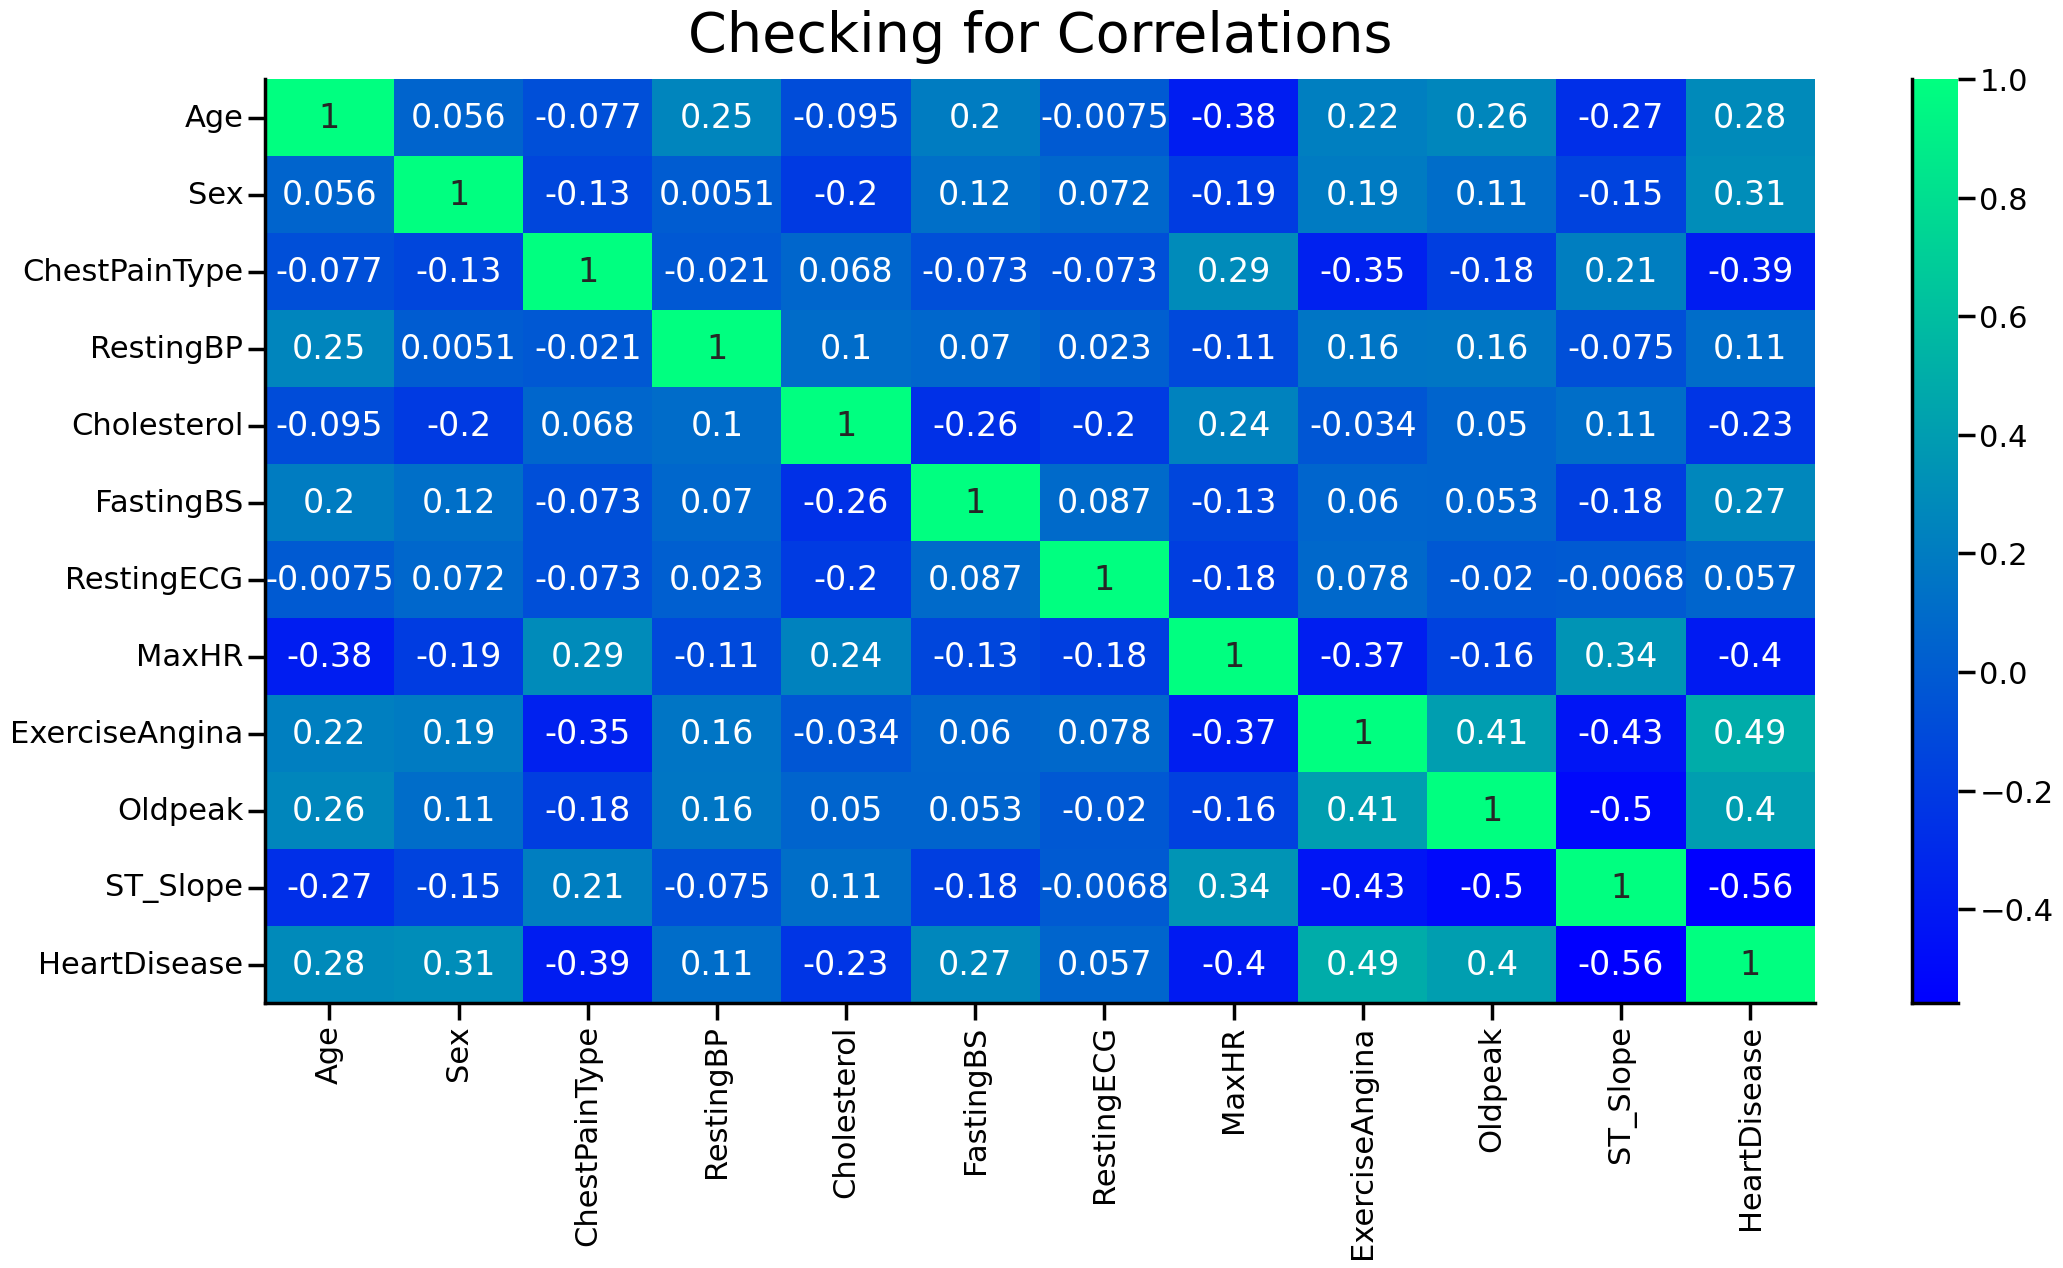

In [11]:
# Creating a heatmap (Hidden Input)
num_cols = df.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=[25,12])
heat = df_encoded.corr()
sns.heatmap(heat, cmap="winter", annot=True)
plt.title("Checking for Correlations", size=40, pad=20)
sns.despine()
plt.show()

### SPLIT THE DATA INTO TEST AND TRAIN

In [12]:
# Seperating the target(y) and the independent(X) features...

y = df_encoded.pop("HeartDisease")
X = df_encoded

In [13]:
y.head(5)

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [14]:
X.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [15]:
# Performing the train_test_split...

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [16]:
# Verifying the split...

X_train.shape, y_train.shape

((642, 11), (642,))

### BUILD THE TREE AND PRINT THE TRAINING AND TEST ACCURACY

In [17]:

from sklearn.metrics import accuracy_score, f1_score
#build model
classifier = DecisionTreeClassifier(random_state=0)
classifier= classifier.fit(X_train,y_train)

In [18]:
print("Accuracy of the training set :{:.3f}".
      format(classifier.
             score(
                 X_train,y_train
             )))

print("Accuracy of the test set :{:.3f}".
      format(classifier.
             score(X_test,y_test
                  )))

Accuracy of the training set :1.000
Accuracy of the test set :0.743


<p style="font-size:120%"> From the above metrics used for evaluating the model, we can see that <strong>our model is overfitting.</strong></p>
<p style="font-size:120%"> We need to perform some <strong>hyperparameter tuning</strong> with this model.</p>

<h3>Hyper-parameter Tuning</strong> </h3>

In [19]:
# Creating an object of the class DecisionTreeClassifier() and assigning a random_state

dt = DecisionTreeClassifier(random_state=42)

In [20]:
# Defining the parameters for the param_grid for our Grid Search...

params = {
     'max_depth':[2,3,4,5,6],
    'min_samples_leaf':[5,10,20,30],
    'criterion':['gini']
}


In [21]:
# Now, we will let GridSearchCV try out all the possible combination of the hyperparameters for our Decision Tree

grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=4, verbose=10, scoring='accuracy')

In [22]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
CPU times: user 41.9 ms, sys: 58.8 ms, total: 101 ms
Wall time: 989 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [5, 10, 20, 30]},
             scoring='accuracy', verbose=10)

In [23]:
# Storing the results of all the combinations that had been tried in a dataframe.

cv_df = pd.DataFrame(grid_search.cv_results_)

In [24]:
# Finding the best score...

grid_search.best_score_

0.8270768633540373

In [25]:
# Finding the best hyper-parameters for the model...

hyper_param = grid_search.best_estimator_
hyper_param

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [26]:
# Assigning the hyper parameter and fitting the model

dt_ = hyper_param

dt_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [27]:
# Predicting on the train and test... 

y_train_pred = dt_.predict(X_train)
y_test_pred = dt_.predict(X_test)

In [28]:
# Evaluating the model: (Accuracy) 

print("Accuracy on the training set: " + str(accuracy_score(y_train, y_train_pred)))
print('*'*20)
print("Accuracy on the test set: " + str(accuracy_score(y_test, y_test_pred)))

Accuracy on the training set: 0.8520249221183801
********************
Accuracy on the test set: 0.8369565217391305


In [29]:
# Building a random Decision Tree with the best parameters
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42 )

dt.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [31]:
# Visualizing the result from the Decision Tree
# Check the number of features in your dataset
from sklearn.tree import export_graphviz
num_features = len(X_test.columns)
feature_names =X_test.columns

# Export the decision tree
export_graphviz(dt,
                out_file='Tree.dot',
                feature_names=feature_names,
                class_names=['No Heart Disease', 'Heart Disease'], 
                rounded=True,
                filled=True)

#plt.figure(figsize=(65,25))
#plot_tree(dt_, feature_names = X.columns, class_names=['No Disease', "Disease"], filled=True);

[CV 2/4; 1/20] START criterion=gini, max_depth=2, min_samples_leaf=5............
[CV 2/4; 1/20] END criterion=gini, max_depth=2, min_samples_leaf=5;, score=0.814 total time=   0.0s
[CV 1/4; 2/20] START criterion=gini, max_depth=2, min_samples_leaf=10...........
[CV 1/4; 2/20] END criterion=gini, max_depth=2, min_samples_leaf=10;, score=0.863 total time=   0.0s
[CV 4/4; 2/20] START criterion=gini, max_depth=2, min_samples_leaf=10...........
[CV 4/4; 2/20] END criterion=gini, max_depth=2, min_samples_leaf=10;, score=0.806 total time=   0.0s
[CV 4/4; 3/20] START criterion=gini, max_depth=2, min_samples_leaf=20...........
[CV 4/4; 3/20] END criterion=gini, max_depth=2, min_samples_leaf=20;, score=0.806 total time=   0.0s
[CV 4/4; 4/20] START criterion=gini, max_depth=2, min_samples_leaf=30...........
[CV 4/4; 4/20] END criterion=gini, max_depth=2, min_samples_leaf=30;, score=0.812 total time=   0.0s
[CV 4/4; 5/20] START criterion=gini, max_depth=3, min_samples_leaf=5............
[CV 4/4; 5

<img src ='tree.png'/>

<ul>
<li style="font-size:120%"> A person regardless of gender, is most likely to have a heart attack if the level of Chest Pain is 1 or beyond.</li>
<li style="font-size:120%"> Even if the Chest Pain is more than 1, male subjects are more at risk then female.</li>
<li style="font-size:120%"> Also, if the Heart Rate is more, combined with Chest Pain of atleast level 1, then the subject will definitely get Heart Attack.</li>
<li style="font-size:120%"> If high RestingBP combined with low ST Slope he/she is at a greater risk of Heart Attack</li>
<li style="font-size:120%"> If the Chest Pain level is below 1 and  if the subject is male and aged, he is at a greater risk of Heart Attack</li>
</ul>

<p style="font-size:120%">Therefore, if any of the above conditions are observed in a subject, they should be immediately given medical attention.</p>